# Exoplanets Classifiers

Aluno: Daniel Souza de Campos

Esse é um trabalho para a matéria de ML na UFMG cujo objetivo é utilizar e avaliar vários modelos de classificação em cima de um [dataset de exoplanetas disponibilizado pela NASA](https://exoplanetarchive.ipac.caltech.edu/).

Este trabalho ficará disponível publicamente no meu [GitHub](https://github.com/Pendulun/ExoplanetsClassifier) após a data final de entrega do trabalho dia 10/06/2022.

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
GLOBAL_RANDOM_STATE = 42

# Carregando o dataset

In [65]:
koiDf = pd.read_csv("koi_data.csv")

In [66]:
koiDf.head(5)

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [67]:
len(koiDf)

5202

In [68]:
len(koiDf.columns)

43

# Normalizando os dados

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
koiDf[koiDf.columns.difference(['kepoi_name','koi_disposition'], sort=False)] = scaler.fit_transform(
                                                koiDf[koiDf.columns.difference(['kepoi_name','koi_disposition'], sort=False)]
                                                )

In [72]:
koiDf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
kepoi_name,5202,5202,K00752.01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_disposition,5202,2,FALSE POSITIVE,3098,NaN,NaN,NaN,NaN,NaN,NaN,NaN
koi_period,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.4154,-0.39383,-0.33532,-0.15365,11.697844
koi_impact,5202.0,NaN,NaN,NaN,-0.0,1.000096,-0.272876,-0.186878,-0.040756,0.078633,38.086232
koi_duration,5202.0,NaN,NaN,NaN,-0.0,1.000096,-0.790355,-0.44625,-0.258767,0.056554,19.094174
koi_depth,5202.0,NaN,NaN,NaN,-0.0,1.000096,-0.318579,-0.315952,-0.311187,-0.286934,12.584014
koi_ror,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.090456,-0.085905,-0.081602,-0.024728,38.52932
koi_srho,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.135912,-0.128906,-0.106145,-0.045697,36.425594
koi_prad,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.030316,-0.029943,-0.029634,-0.024486,54.125373
koi_sma,5202.0,NaN,NaN,NaN,0.0,1.000096,-0.624341,-0.517627,-0.349492,0.000222,7.76093


Agora, podemos ver que as colunas quantitativas possuem a média igual a 0 e desvio padrão igual a 1.

# Separando em dados de treino e de teste

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
Y = koiDf['koi_disposition']
X = koiDf[koiDf.columns.difference(['kepoi_name','koi_disposition'], sort=False)]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)

Teremos 20% dos dados para teste.

In [76]:
print(f"Dados de treino: {len(X_train)}. Dados de teste: {len(X_test)}.")

Dados de treino: 4161. Dados de teste: 1041.


In [77]:
y_train.value_counts()

FALSE POSITIVE    2466
CONFIRMED         1695
Name: koi_disposition, dtype: int64

In [78]:
y_test.value_counts()

FALSE POSITIVE    632
CONFIRMED         409
Name: koi_disposition, dtype: int64

# Gaussian Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
model_name = 'naive_bayes'
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

### Avaliação

In [80]:
models_scores = dict()

In [81]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
print(classification_report(y_test, y_pred, digits=3))
models_scores[model_name] = {'acc':accuracy_score(y_test, y_pred)}

                precision    recall  f1-score   support

     CONFIRMED      0.830     0.966     0.893       409
FALSE POSITIVE      0.975     0.872     0.921       632

      accuracy                          0.909      1041
     macro avg      0.903     0.919     0.907      1041
  weighted avg      0.918     0.909     0.910      1041



In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [83]:
def plotConfusionMatrix(y_test, y_pred, model=None, model_score_dict=None):
    """
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
    """
    cm = confusion_matrix(y_test, y_pred)
    if model != None:
        model_score_dict[model]['confirmed_acc'] = cm[0][0]
        model_score_dict[model]['false_positive_acc'] = cm[1][1]
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
    plt.show()

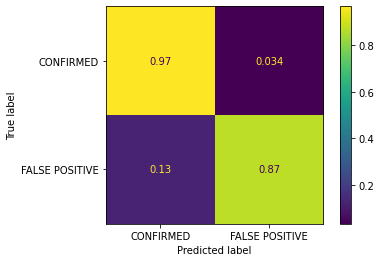

In [84]:
plotConfusionMatrix(y_test, y_pred, model_name, models_scores)

Podemos observar que o modelo obteve altíssima precisão ao detectar FALSE POSITIVEs, mas sua revocação foi menor quando comparada à revocação de CONFIRMED. No geral, sua acurácia foi de 0.909. Um número muito bom.

In [85]:
def toOnesAndZeros(array, positive_label = 'CONFIRMED'):
    myArray = np.array([1 if x == positive_label else 0 for x in array])
    return myArray

In [89]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(toOnesAndZeros(y_test), toOnesAndZeros(y_pred))

In [90]:
def plotROC(fpr, tpr, model_name, model_scores):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    """
    plt.figure(figsize=(8,6))
    lw = 2
    aucArea = auc(fpr,tpr)
    model_scores[model_name]['roc area'] = aucArea
    models_scores[model_name]['fpr'] = fpr
    models_scores[model_name]['tpr'] = tpr
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % aucArea,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

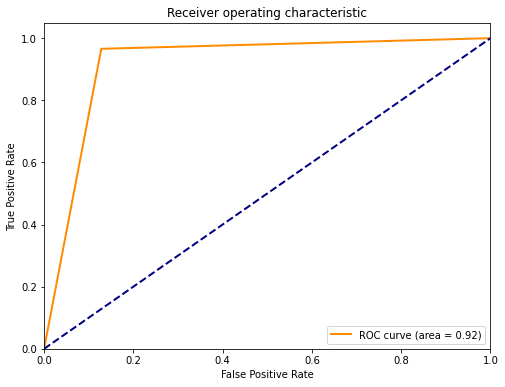

In [91]:
plotROC(fpr, tpr, model_name, models_scores)

# Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model_name = 'decision_tree'
grid_params = {
    'criterion':['entropy'],
    'random_state': [GLOBAL_RANDOM_STATE],
    'max_depth': [5, 10, 20, 30, int(10E+10)], # int(10E+10) == profundidade infinita
    'min_samples_split': [2, 8]
}

Vamos realizar um GridSearch com validação cruzada (CV) para tunnar os hiperparâmetros do modelo.

As principais questões de uma árvore de classificação são: A profundidade e a quantidade de dados por nó mínima para continuar a expansão da árvore. Eles são importantes pois, quanto maior a profundidade possível, mais ajustado ao dado de treino o modelo poderá ser. Esse ajuste também é influenciado pela quantidade mínima de dados necessário em cada nó para realizar o split. Alterar ambos para serem mais restritivos acaba que realizamos *early stopping*.

Dessa forma, serão testadas combinações desses dois hiperparâmetros.

Além disso, o critério de escolha de melhor característica a ser usada na divisão será a entropia e não o gini.

In [94]:
%%time
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, grid_params, scoring = 'accuracy', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

CPU times: user 271 ms, sys: 76.9 ms, total: 348 ms
Wall time: 2.88 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [5, 10, 20, 30, 100000000000],
                         'min_samples_split': [2, 8], 'random_state': [42]},
             scoring='accuracy')

O Grid Search foi configurado para medir a [acurácia](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules) do modelo com 5 splits.

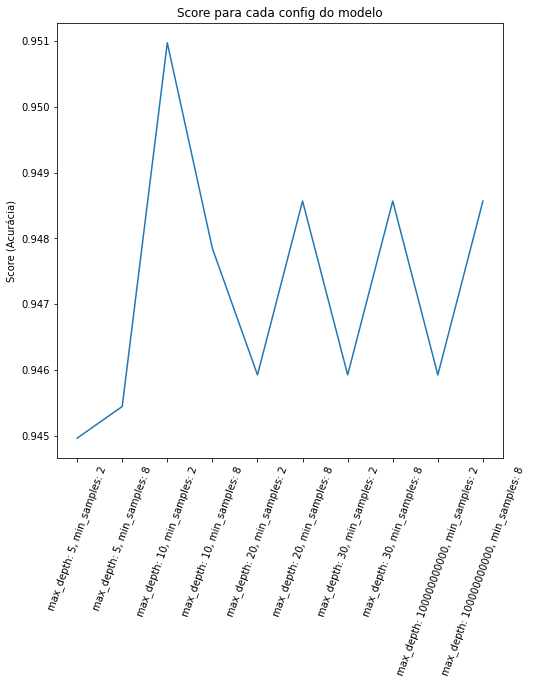

In [95]:
x_labels = []
for config in clf.cv_results_['params']:
    label = 'max_depth: '+str(config['max_depth'])+", min_samples: "+str(config['min_samples_split'])
    x_labels.append(label)

plt.figure(figsize=(8,8))
plt.title("Score para cada config do modelo")
plt.plot(x_labels, clf.cv_results_['mean_test_score'])
plt.xticks(rotation = 70)
plt.ylabel("Score (Acurácia)")
plt.show()

Podemos ver que o melhor modelo encontrado foi o com a seguinte configuração: 


In [96]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 2,
 'random_state': 42}

E obteve o seguinte score na validação:

In [97]:
clf.best_score_

0.9509733701172776

Além disso, pode-se perceber que, apesar de permitirmos uma profundidade (praticamente) infinita, ela não foi melhor do que a com profundidade máxima de 10. Provavelmente, ela não conseguiu generalizar tão bem e isso foi sentido na validação.

# Testando a melhor DecisionTree

In [98]:
from sklearn.metrics import PrecisionRecallDisplay

In [99]:
def plotPrecisionRecall(estimator, X_test, y_test):
    display = PrecisionRecallDisplay.from_estimator(
        estimator, X_test, y_test, name="RandomForest"
    )
    _ = display.ax_.set_title("2-class Precision-Recall curve")
    
def plotBestEstimatorResults(estimator, X_test, y_test, model_name, model_scores):
    y_pred = estimator.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))
    model_scores[model_name] = {'acc': accuracy_score(y_test, y_pred)}
    plotConfusionMatrix(y_test, y_pred, model_name, model_scores)
    fpr, tpr, thresholds = roc_curve(toOnesAndZeros(y_test), toOnesAndZeros(y_pred))
    plotROC(fpr, tpr, model_name, model_scores)
    plotPrecisionRecall(estimator, X_test, y_test)
    

                precision    recall  f1-score   support

     CONFIRMED      0.935     0.949     0.942       409
FALSE POSITIVE      0.966     0.957     0.962       632

      accuracy                          0.954      1041
     macro avg      0.951     0.953     0.952      1041
  weighted avg      0.954     0.954     0.954      1041



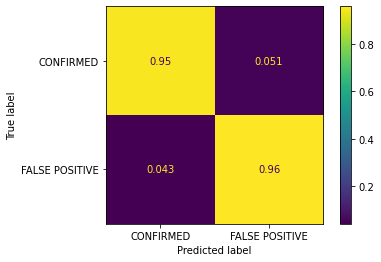

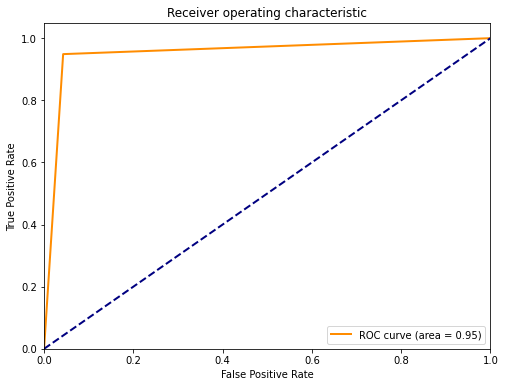

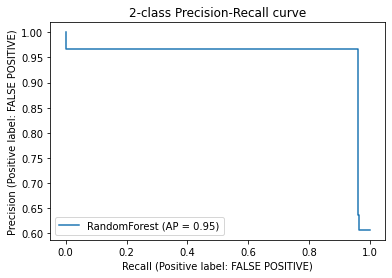

In [100]:
plotBestEstimatorResults(clf.best_estimator_, X_test, y_test, model_name, models_scores)

Dessa vez, podemos perceber que o valor de precisão de FALSE POSITIVEs diminuiu um pouco mas a precisão para CONFIRMED aumentou consideravelmente quando comparado com o Gaussian Naive Bayes. A acurácia também aumentou.

Até agora, temos os seguintes dados:

In [101]:
pd.DataFrame.from_dict(models_scores, orient='index')

,acc,confirmed_acc,false_positive_acc,fpr,tpr,roc area
naive_bayes,0.908742,395,551,"[0.0, 0.1281645569620253, 1.0]","[0.0, 0.9657701711491442, 1.0]",0.918803
decision_tree,0.953890,388,605,"[0.0, 0.04272151898734177, 1.0]","[0.0, 0.9486552567237164, 1.0]",0.952967


# SVM

In [102]:
from sklearn.svm import SVC

model_name = 'svc'
grid_params = [
    {'kernel':['linear']},
    {'kernel':['poly'], 'degree':[2, 3, 4, 5, 10]},
    {'kernel':['rbf']},
    {'kernel':['sigmoid']}
]

Assim como nas árvores de decisão, também vamos tunnar hiperparâmetros via Grid Search e validação cruzada. No caso, serão testados todos os [kernels já providos pelo sklearn para o SVC](https://scikit-learn.org/stable/modules/svm.html#kernel-functions). Os kernels são funções aplicadas aos dados para que ajudem, ou provavelmente, permitam, o SVM separar os dados linearmente ao adicionar mais uma dimensão.

In [103]:
%%time
svc = SVC()
clf = GridSearchCV(svc, grid_params, scoring = 'accuracy', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

CPU times: user 293 ms, sys: 13.5 ms, total: 307 ms
Wall time: 4.18 s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4, 5, 10], 'kernel': ['poly']},
                         {'kernel': ['rbf']}, {'kernel': ['sigmoid']}],
             scoring='accuracy')

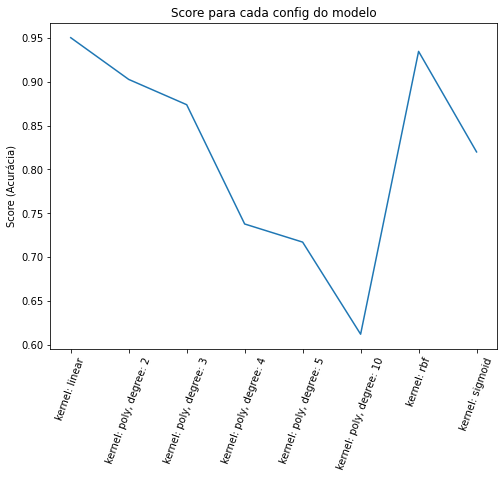

In [104]:
x_labels = []
for config in clf.cv_results_['params']:
    label = 'kernel: '+ config['kernel']
    if config['kernel'] == 'poly': 
        label += ", degree: "+str(config['degree'])
    x_labels.append(label)

plt.figure(figsize=(8,6))
plt.title("Score para cada config do modelo")
plt.plot(x_labels, clf.cv_results_['mean_test_score'])
plt.xticks(rotation = 70)
plt.ylabel("Score (Acurácia)")
plt.show()

O melhor modelo foi o com a seguinte configuração:

In [105]:
clf.best_params_

{'kernel': 'linear'}

Com score de validação:

In [106]:
clf.best_score_

0.9502556791947547

Um pouco surpreendente o resultado de que o melhor kernel para um problema com tantas features foi o linear. Inclusive, com um kernel polinomial, quanto maior o grau, pior o score do modelo.

## Testando o melhor SVC

                precision    recall  f1-score   support

     CONFIRMED      0.907     0.976     0.940       409
FALSE POSITIVE      0.983     0.935     0.959       632

      accuracy                          0.951      1041
     macro avg      0.945     0.955     0.949      1041
  weighted avg      0.953     0.951     0.951      1041



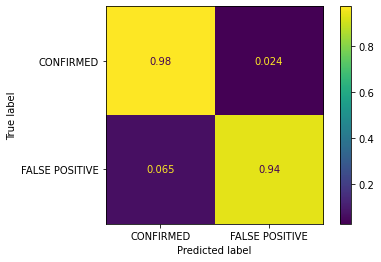

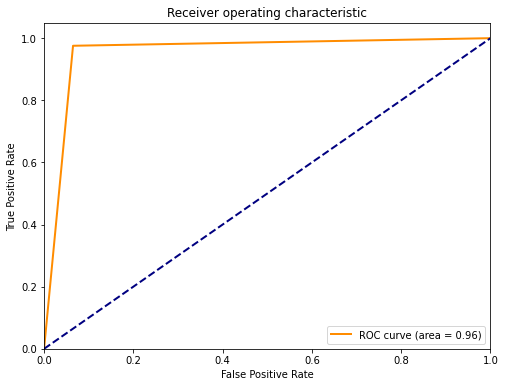

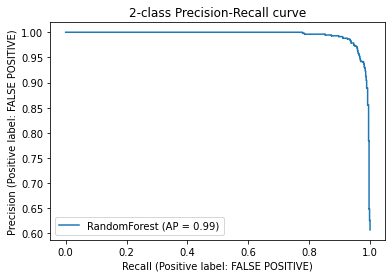

In [107]:
plotBestEstimatorResults(clf.best_estimator_, X_test, y_test, model_name, models_scores)

In [108]:
pd.DataFrame.from_dict(models_scores, orient='index')

,acc,confirmed_acc,false_positive_acc,fpr,tpr,roc area
naive_bayes,0.908742,395,551,"[0.0, 0.1281645569620253, 1.0]","[0.0, 0.9657701711491442, 1.0]",0.918803
decision_tree,0.953890,388,605,"[0.0, 0.04272151898734177, 1.0]","[0.0, 0.9486552567237164, 1.0]",0.952967
svc,0.951009,399,591,"[0.0, 0.06487341772151899, 1.0]","[0.0, 0.9755501222493888, 1.0]",0.955338


Pelos dados até agora, podemos perceber que o svc linear possui uma acurácia pior mas muito parecida com a árvore de decisão. Ele conseguiu classificar corretamente mais casos de CONFIRMED do que o naive bayes mas foi pior do que a árvore de decisão para o caso de FALSE POSITIVEs.

# K-NN

In [109]:
from sklearn.neighbors import KNeighborsClassifier

model_name = 'knn'

grid_params = {
    'n_neighbors': range(1, 16)
}

Também usaremos o Grid Search para testar o melhor modelo de K-NN variando a quantidade de vizinhos. Não será utilizado o [RadiusNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html) já que, como a própria [documentação do sklearn explica](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification): *For high-dimensional parameter spaces, this method becomes less effective due to the so-called 'curse of dimensionality'*. Imagino que 41 dimensões de features sejam bastante dimensões. 

A quantidade de vizinhos utilizada influencia na classificação. Usar poucos vizinhos significa que esperamos que os dados sejam facilmente distinguíveis pelos seus vizinhos mais próximos, ou seja, as classes são bem separadas umas as outras dado sua disposição ao longo das dimensões. Um valor de vizinhos mais alto signfica que esperamos que os dados de classes diferentes estejam mais próximos uns dos outros e é necessário levar em consideração mais pontos.

In [110]:
%%time
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, grid_params, scoring = 'accuracy', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

CPU times: user 110 ms, sys: 12.3 ms, total: 122 ms
Wall time: 810 ms


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 16)}, scoring='accuracy')

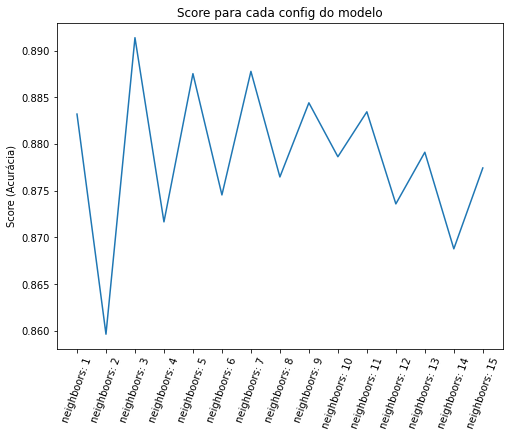

In [111]:
x_labels = []
for config in clf.cv_results_['params']:
    label = 'neighboors: '+str(config['n_neighbors'])
    x_labels.append(label)

plt.figure(figsize=(8,6))
plt.title("Score para cada config do modelo")
plt.plot(x_labels, clf.cv_results_['mean_test_score'])
plt.xticks(rotation = 70)
plt.ylabel("Score (Acurácia)")
plt.show()

O melhor modelo foi o com a configuração:

In [112]:
clf.best_params_

{'n_neighbors': 3}

E obteve score de:

In [113]:
clf.best_score_

0.891376454427925

Pelo jeito, usando um pequeno número de vizinhos, 3, o modelo foi melhor. Isso mostra que os dados com classificações diferentes não se misturam muito. Entretanto, seu score de validação foi o menor até agora.

## Testando o melhor KNN

                precision    recall  f1-score   support

     CONFIRMED      0.819     0.976     0.891       409
FALSE POSITIVE      0.982     0.861     0.917       632

      accuracy                          0.906      1041
     macro avg      0.901     0.918     0.904      1041
  weighted avg      0.918     0.906     0.907      1041



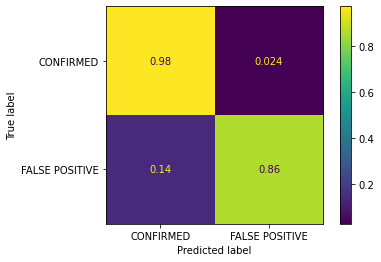

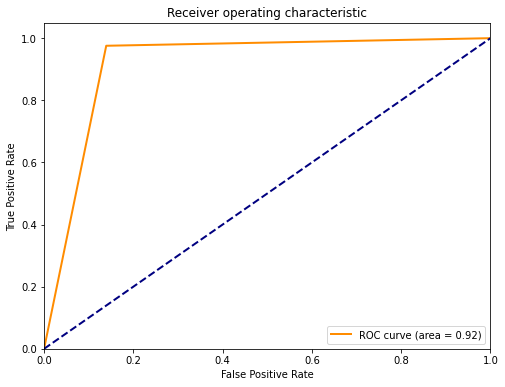

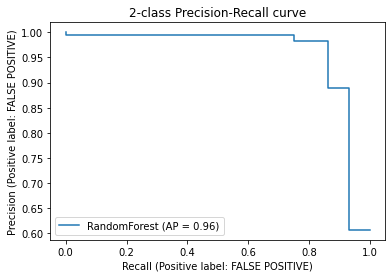

In [114]:
plotBestEstimatorResults(clf.best_estimator_, X_test, y_test, model_name, models_scores)

In [115]:
pd.DataFrame.from_dict(models_scores, orient='index')

,acc,confirmed_acc,false_positive_acc,fpr,tpr,roc area
naive_bayes,0.908742,395,551,"[0.0, 0.1281645569620253, 1.0]","[0.0, 0.9657701711491442, 1.0]",0.918803
decision_tree,0.953890,388,605,"[0.0, 0.04272151898734177, 1.0]","[0.0, 0.9486552567237164, 1.0]",0.952967
svc,0.951009,399,591,"[0.0, 0.06487341772151899, 1.0]","[0.0, 0.9755501222493888, 1.0]",0.955338
knn,0.905860,399,544,"[0.0, 0.13924050632911392, 1.0]","[0.0, 0.9755501222493888, 1.0]",0.918155


Aparentemente, o melhor modelo de knn escolhido é o que performa pior dentre os modelos já considerados com acurácia de 0.906. Ele até conseguiu igualar a identificação de CONFIRMEDs com o SVC, mas foi o pior para identificar FALSE POSITIVEs.

# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

model_name = 'random_forest'

grid_params = {
    'random_state': [GLOBAL_RANDOM_STATE],
    'n_estimators': [10, 20, 30, 40, 60, 80, 100],
    'criterion': ['entropy'],
    'max_depth': [10, 20, 30]
}

Também iremos utilizar do GridSearchCV. Os principais parâmetros a serem avaliados no RandomForest são: a quantidade de árvores e a profundidade máxima das árvores. Como quando usamos o DecisionTree ficou de acordo que o mínimo de dados necessários para aplicar um split continua em 2, esse parâmetro não foi variado.

O parâmetro *n_estimators* é usado para indicar quantas árvores estarão presentes nesse *ensemble*. Cada árvore possui uma certa aleatoriedade presente. Essa aleatoriedade é vista como o subconjunto dos dados de treino enviados àquela árvore para que ela treine.

O *max_depth* também é variado para que árvores maiores e menores sejam encontradas e seus *scores* sejam comparados.

In [117]:
%%time
rforest = RandomForestClassifier()
clf = GridSearchCV(rforest, grid_params, scoring = 'accuracy', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

CPU times: user 1.41 s, sys: 6.74 ms, total: 1.42 s
Wall time: 11.8 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 20, 30],
                         'n_estimators': [10, 20, 30, 40, 60, 80, 100],
                         'random_state': [42]},
             scoring='accuracy')

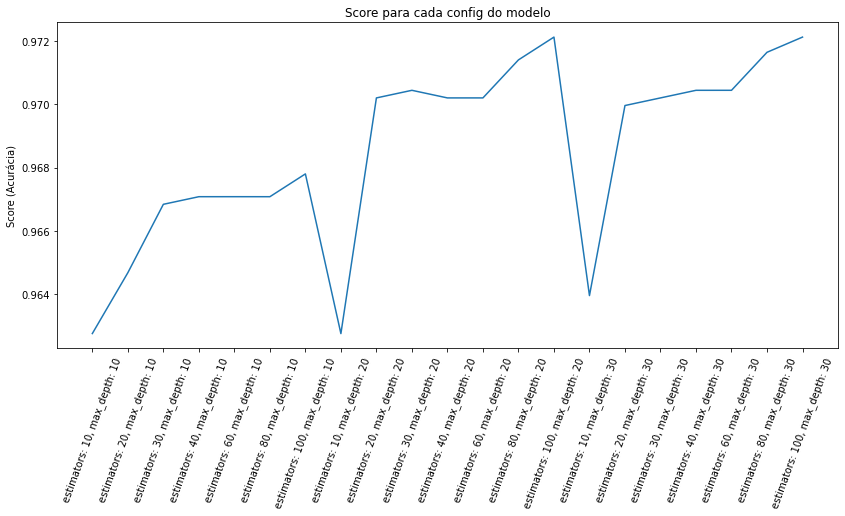

In [118]:
x_labels = []
for config in clf.cv_results_['params']:
    label = 'estimators: '+str(config['n_estimators'])
    label += ', max_depth: '+str(config['max_depth'])
    x_labels.append(label)

plt.figure(figsize=(14,6))
plt.title("Score para cada config do modelo")
plt.plot(x_labels, clf.cv_results_['mean_test_score'])
plt.xticks(rotation = 70)
plt.ylabel("Score (Acurácia)")
plt.show()

Podemos perceber que, quanto mais estimadores, maior é o score da RandomForest para um mesmo limite de profundidade.

O melhor modelo foi o que tem a seguinte configuração:

In [119]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 100,
 'random_state': 42}

E obteve o score de:

In [120]:
clf.best_score_

0.9721237533474929

## Testando o melhor RandomForest

                precision    recall  f1-score   support

     CONFIRMED      0.945     0.976     0.960       409
FALSE POSITIVE      0.984     0.964     0.974       632

      accuracy                          0.968      1041
     macro avg      0.965     0.970     0.967      1041
  weighted avg      0.969     0.968     0.968      1041



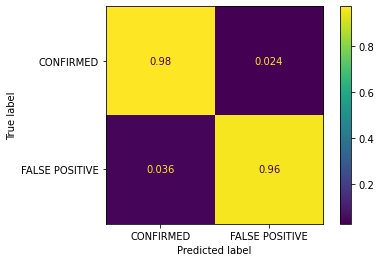

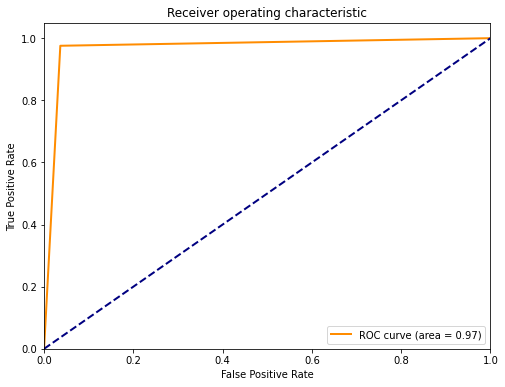

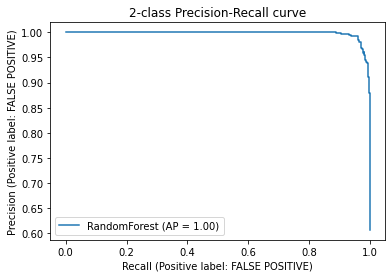

In [121]:
plotBestEstimatorResults(clf.best_estimator_, X_test, y_test, model_name, models_scores)

In [122]:
pd.DataFrame.from_dict(models_scores, orient='index')

,acc,confirmed_acc,false_positive_acc,fpr,tpr,roc area
naive_bayes,0.908742,395,551,"[0.0, 0.1281645569620253, 1.0]","[0.0, 0.9657701711491442, 1.0]",0.918803
decision_tree,0.953890,388,605,"[0.0, 0.04272151898734177, 1.0]","[0.0, 0.9486552567237164, 1.0]",0.952967
svc,0.951009,399,591,"[0.0, 0.06487341772151899, 1.0]","[0.0, 0.9755501222493888, 1.0]",0.955338
knn,0.905860,399,544,"[0.0, 0.13924050632911392, 1.0]","[0.0, 0.9755501222493888, 1.0]",0.918155
random_forest,0.968300,399,609,"[0.0, 0.03639240506329114, 1.0]","[0.0, 0.9755501222493888, 1.0]",0.969579


O RandomForest foi o que conseguiu maior acurácia dentre todos os modelos até agora (0.96). Comparando com o SVC, ele conseguiu classificar corretamente mais FALSE POSITIVEs.

# Gradient Tree Boosting

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

model_name = 'gradient_tree_boosting'

grid_params = {
    'criterion' : ['squared_error'],
    'random_state': [GLOBAL_RANDOM_STATE],
    'n_estimators': [20, 40, 80, 100, 130],
    'learning_rate' : [0.1, 0.08, 0.05, 0.01]
}

Como esse modelo utiliza do Gradiente de uma função de erro para ajustar as suas árvores, ele precisa de um fator de *learning_rate*. Dessa forma, esse é um dos parâmetros variados. O outro parâmetro variado são a quantidade de árvores representado pelo *n_estimators*.

In [124]:
%%time
gbc = GradientBoostingClassifier()
clf = GridSearchCV(gbc, grid_params, scoring = 'accuracy', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

CPU times: user 4.48 s, sys: 0 ns, total: 4.48 s
Wall time: 43 s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['squared_error'],
                         'learning_rate': [0.1, 0.08, 0.05, 0.01],
                         'n_estimators': [20, 40, 80, 100, 130],
                         'random_state': [42]},
             scoring='accuracy')

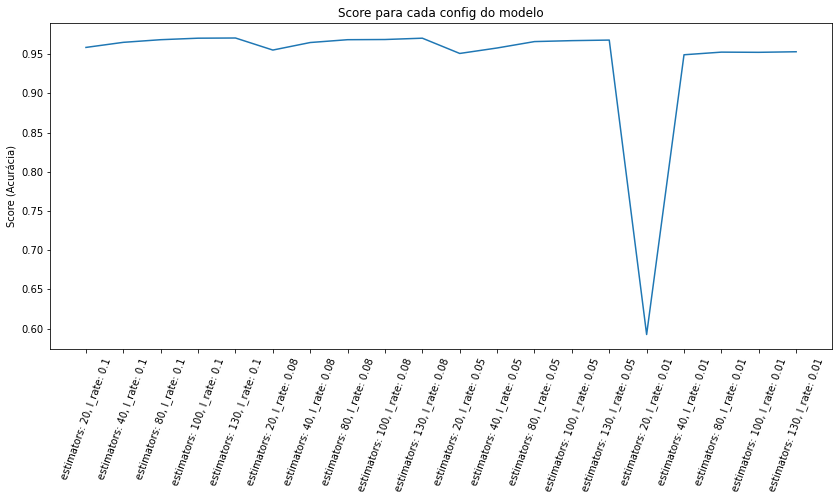

In [125]:
x_labels = []
for config in clf.cv_results_['params']:
    label = 'estimators: '+str(config['n_estimators'])
    label += ', l_rate: '+str(config['learning_rate'])
    x_labels.append(label)

plt.figure(figsize=(14,6))
plt.title("Score para cada config do modelo")
plt.plot(x_labels, clf.cv_results_['mean_test_score'])
plt.xticks(rotation = 70)
plt.ylabel("Score (Acurácia)")
plt.show()

Podemos perceber que, independente da quantidade de *estimators* ou do *learning rate*, todas as configurações possuem um *score* alto a não ser pelo modelo com 20 *estimators* e *learning_rate* igual a 0.01 por algum motivo.

O melhor modelo foi o de configuração:

In [126]:
clf.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'n_estimators': 130,
 'random_state': 42}

Com o score de:

In [127]:
clf.best_score_

0.9706811570782159

## Testando o melhor GradientTreeBoosting

                precision    recall  f1-score   support

     CONFIRMED      0.950     0.985     0.968       409
FALSE POSITIVE      0.990     0.967     0.978       632

      accuracy                          0.974      1041
     macro avg      0.970     0.976     0.973      1041
  weighted avg      0.975     0.974     0.974      1041



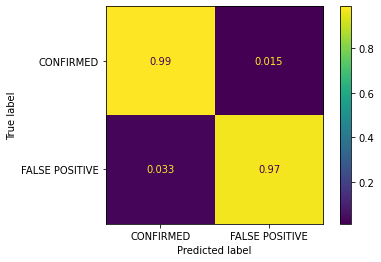

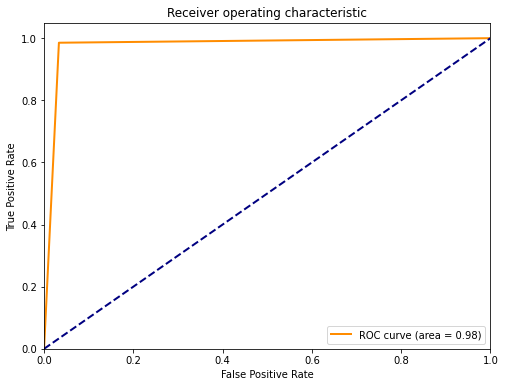

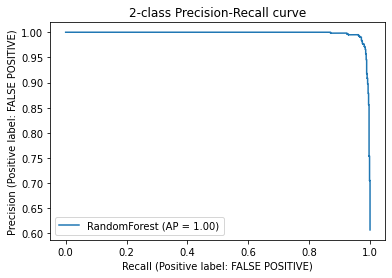

In [128]:
plotBestEstimatorResults(clf.best_estimator_, X_test, y_test, model_name, models_scores)

# Resultados finais

In [129]:
final_scores = pd.DataFrame.from_dict(models_scores, orient='index')
final_scores.sort_values(by='acc', ascending=False)

,acc,confirmed_acc,false_positive_acc,fpr,tpr,roc area
gradient_tree_boosting,0.974063,403,611,"[0.0, 0.03322784810126582, 1.0]","[0.0, 0.9853300733496333, 1.0]",0.976051
random_forest,0.968300,399,609,"[0.0, 0.03639240506329114, 1.0]","[0.0, 0.9755501222493888, 1.0]",0.969579
decision_tree,0.953890,388,605,"[0.0, 0.04272151898734177, 1.0]","[0.0, 0.9486552567237164, 1.0]",0.952967
svc,0.951009,399,591,"[0.0, 0.06487341772151899, 1.0]","[0.0, 0.9755501222493888, 1.0]",0.955338
naive_bayes,0.908742,395,551,"[0.0, 0.1281645569620253, 1.0]","[0.0, 0.9657701711491442, 1.0]",0.918803
knn,0.905860,399,544,"[0.0, 0.13924050632911392, 1.0]","[0.0, 0.9755501222493888, 1.0]",0.918155


O modelo de Gradient Tree Boosting foi o que obteve a maior acurácia de todos com 0.97. Ele conseguiu classificar corretamente mais CONFIRMEDs (99%) e FALSE POSITIVEs (97%) do que todos os outros modelos. Apenas para lembrar, os dados de teste tinham a seguinte divisão de classes:

In [130]:
y_test.value_counts()

FALSE POSITIVE    632
CONFIRMED         409
Name: koi_disposition, dtype: int64

In [156]:
def plotAllRocCurves(models_info):
    """
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    """
    plt.figure(figsize=(10,6))
    lw = 2
    
    for model_name in (models_info.keys()):
    
        fpr = models_info[model_name]['fpr']
        tpr = models_info[model_name]['tpr']
        aucArea = auc(fpr,tpr)
        label = model_name + " (area = %.2f)" %aucArea
        plt.plot(
            fpr,
            tpr,
            lw=lw,
            label = label
        )
    
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

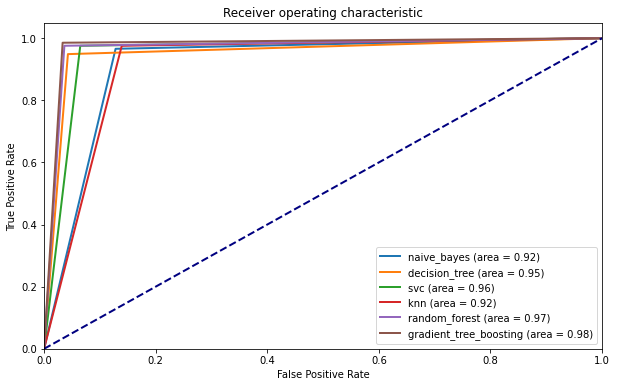

In [157]:
plotAllRocCurves(models_scores)

Podemos ver que todos os modelos possuem AUC próximo de 1. Isso significa que todos eles conseguem diferenciar muito bem entre as classes de dados. Entretanto, a AUC do GTB é bem mais perto de 1 do que os outros e, portanto, ele consegue discriminar melhor.